In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 读取数据

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

### 计算最佳拟合直线
$w'=\left(X^TX\right)^{-1}X^Ty$

In [3]:
def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:    # 判断行列式是否为0
        print('This matrix is singular, cannot do inverse.')
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

### 局部加权线性回归函数
$w'=\left(X^TWX\right)^{-1}X^TWy$  
高斯核：  
$w\left(i,i\right)=exp\left(\frac{\left|x^{(i)}-x\right|}{-2k^2}\right)$

In [4]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))    # 创建对角矩阵
    # 样本点与代预测点距离越远，权重以指数级衰减，k控制衰减速度
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = np.exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:    # 判断行列式是否为0
        print('This matrix is singular, cannot do inverse.')
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [5]:
# 为数据集中每个点调用lwlr()
def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [6]:
xArr, yArr = loadDataSet('ex0.txt')
yHat = lwlrTest(xArr, xArr, yArr, 0.03)

### 画图

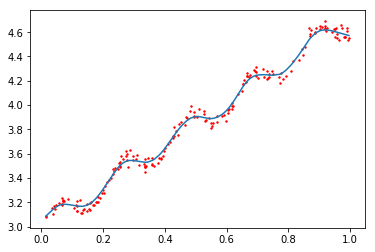

In [7]:
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd])
ax.scatter(xMat[:, 1].flatten().A[0], np.mat(yArr).T[:, 0].flatten().A[0], s=2, c='red')
plt.show()

In [8]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr)**2).sum()

In [9]:
abX, abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[0: 99], abX[0: 99], abY[0: 99], 0.1)
yHat1 = lwlrTest(abX[0: 99], abX[0: 99], abY[0: 99], 1)
yHat10 = lwlrTest(abX[0: 99], abX[0: 99], abY[0: 99], 10)

In [10]:
rssError(abY[0: 99], yHat01.T)

56.78420911837208

In [11]:
rssError(abY[0: 99], yHat1.T)

429.89056187030394

In [12]:
rssError(abY[0: 99], yHat10.T)

549.1181708826065

In [13]:
yHat01 = lwlrTest(abX[100: 199], abX[0: 99], abY[0: 99], 0.1)
rssError(abY[100: 199], yHat01.T)

25119.459111157415

In [14]:
yHat1 = lwlrTest(abX[100: 199], abX[0: 99], abY[0: 99], 1.0)
rssError(abY[100: 199], yHat1.T)

573.5261441895706

In [15]:
yHat10 = lwlrTest(abX[100: 199], abX[0: 99], abY[0: 99], 10)
rssError(abY[100: 199], yHat10.T)

517.5711905381745

In [16]:
ws = standRegres(abX[0: 99], abY[0: 99])
yHat = np.mat(abX[100: 199]) * ws
rssError(abY[100: 199], yHat.T.A)

518.6363153249365